In [24]:
import pandas as pd
import json
import torch
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from biological_fuzzy_logic_networks.DREAM_analysis.utils import create_bfz, prepare_cell_line_data, cl_data_to_input

In [25]:
work_dir = "/dccstor/ipc1/CAR/DREAM/Model/Test/MEK_FAK_ERK/"

In [26]:
succes_runs = [9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 25, 26]
config_list = []
for i in succes_runs:
    ckpt = torch.load(f"{work_dir}{i}/model.pt")
    print(ckpt["loss"])
    
    with open(f"{work_dir}{i}/{i}_config.json") as f:
        config = json.load(f)
        
    
    print(config["learning_rate"])
    print(config["batch_size"])
    config_list.append(config)
        
    

tensor(0.0267)
0.01
300
tensor(0.0267)
0.01
300
tensor(0.0267)
0.01
300
tensor(0.0267)
0.005
300
tensor(0.0267)
0.005
300
tensor(0.0267)
0.005
300
tensor(0.0267)
0.01
1000
tensor(0.0267)
0.01
1000
tensor(0.0267)
0.01
1000
tensor(0.0267)
0.005
1000
tensor(0.0267)
0.005
1000
tensor(0.0267)
0.005
1000
tensor(0.0267)
0.2
1000
tensor(0.0267)
0.2
1000
tensor(0.0267)
0.2
1000


In [27]:
sqrt(0.0267)

0.16340134638368192

In [28]:
temp=[{key: value for key, value in config.items() if key in ["learning_rate", "n_epochs", "batch_size"]} for config in config_list]
succes_params = pd.concat([pd.DataFrame(c, 
                        index=[0,1,2]) for c in temp], 
          keys=succes_runs, 
          names=["param_setting", ""]).reset_index("param_setting", drop=False).reset_index(drop=True)


In [29]:
config

{'pkn_sif': '/dccstor/ipc1/CAR/DREAM/DREAMdata/MEK_FAK_ERK.sif',
 'network_class': 'DREAMBioFuzzNet',
 'data_file': ['/dccstor/ipc1/CAR/DREAM/DREAMdata/HCC1428.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/HCC70.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/HCC202.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/BT20.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/MDAMB415.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/HCC2157.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/MCF10F.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/BT474.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/CAMA1.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/Hs578T.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/MCF7.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/MDAMB175VII.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/MCF10A.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/UACC812.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/ZR751.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/ZR7530.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMdata/CAL120.csv',
  '/dccstor/ipc1/CAR/DREAM/DREAMd

In [25]:
model = create_bfz(config["pkn_sif"], config["network_class"])


In [27]:
model.load_from_checkpoint(ckpt["model_state_dict"])

In [28]:
model

In [26]:
ckpt

{'epoch': 99,
 'model_state_dict': OrderedDict([('MEK12@@@MEK_and_FAK.n', tensor([2.6959])),
              ('MEK12@@@MEK_and_FAK.K', tensor([-9.3114])),
              ('FAK@@@MEK_and_FAK.n', tensor([2.8319])),
              ('FAK@@@MEK_and_FAK.K', tensor([-12.0929]))]),
 'optimizer_state_dict': {'state': {0: {'step': 252900,
    'exp_avg': tensor([-4.9405e-18]),
    'exp_avg_sq': tensor([3.2796e-25])},
   1: {'step': 252900,
    'exp_avg': tensor([6.5884e-26]),
    'exp_avg_sq': tensor([3.2886e-24])},
   2: {'step': 252900,
    'exp_avg': tensor([-1.5195e-18]),
    'exp_avg_sq': tensor([4.0509e-26])},
   3: {'step': 252900,
    'exp_avg': tensor([1.1342e-31]),
    'exp_avg_sq': tensor([3.0238e-25])}},
  'param_groups': [{'lr': 0.2,
    'betas': (0.9, 0.999),
    'eps': 1e-08,
    'weight_decay': 0,
    'amsgrad': False,
    'maximize': False,
    'params': [0, 1, 2, 3]}]},
 'loss': tensor(0.0267)}

In [81]:
test_cell_lines = ["AU565", "MDAMB436", "EFM19", "HCC2218", "LY2", "MACLS2"]
test_file_paths = [f"/dccstor/ipc1/CAR/DREAM/DREAMdata/{CL}.csv" for CL in test_cell_lines]

cl_data = prepare_cell_line_data(
        data_file=test_file_paths,
        time_point=9)

(train_data, valid_data,
train_inhibitors, valid_inhibitors,
train_input, valid_input,
train, valid,) = cl_data_to_input(
    data=cl_data,
    model=model,
    train_treatments=None,
    valid_treatments=None,
    train_cell_lines=None,
    valid_cell_lines=None,
    inhibition_value=1,
    minmaxscale=True,
    add_root_values=False,
    input_value=None,
    root_nodes=None
)

all_test_data = {node: torch.cat((train_data[node], valid_data[node])) for node in train_data.keys()}
all_test_input = {node: torch.cat((train_input[node], valid_input[node])) for node in train_input.keys()}
all_test_inhibitors = {node: torch.cat((train_inhibitors[node], valid_inhibitors[node])) for node in train_inhibitors.keys()}
all_test = (pd.concat([train, valid])[["MEK12", "FAK", "ERK12", "treatment"]]).reset_index(drop=True)

['AU565' 'MDAMB436' 'EFM19' 'HCC2218' 'LY2' 'MACLS2']


In [82]:
with torch.no_grad():
    model.set_network_ground_truth(all_test_input)
    model.sequential_update(model.root_nodes, all_test_inhibitors)

In [83]:
all_test_pred = pd.DataFrame({node: value.numpy() for node, value in model.output_states.items()})

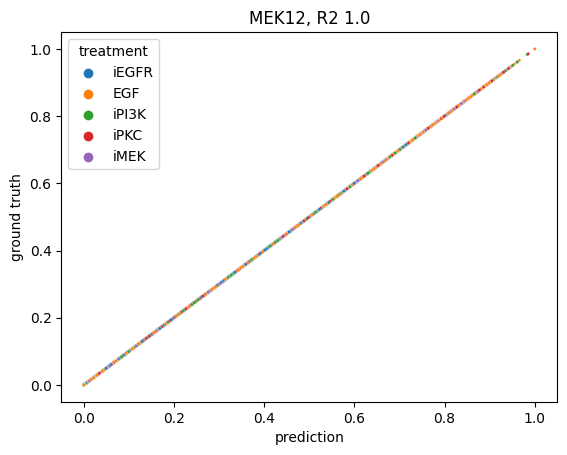

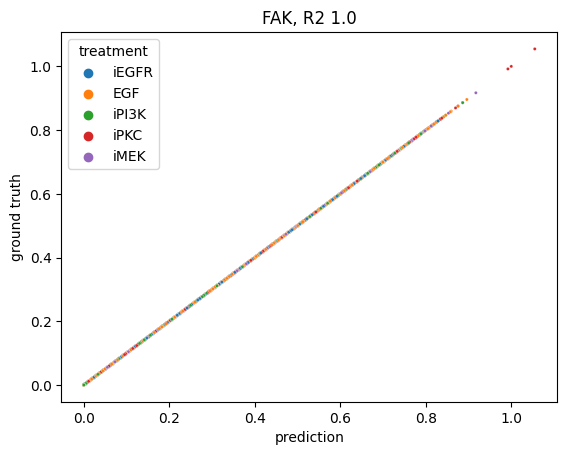

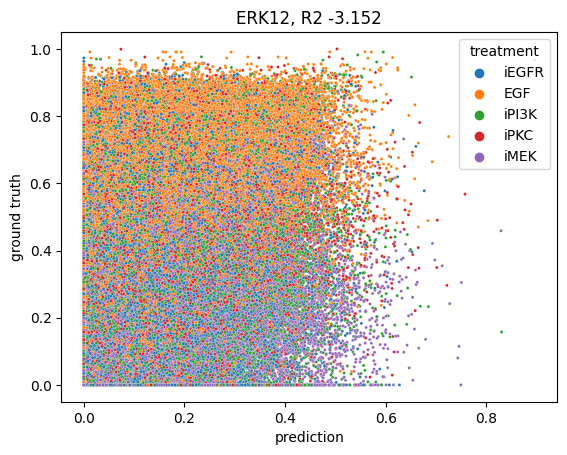

In [86]:
for node in all_test_pred.columns:
    sns.scatterplot(x= all_test_pred[node], y=all_test[node], hue=all_test["treatment"], s=5)
    r2 = r2_score(y_true=all_test[node], y_pred=all_test_pred[node])
    plt.xlabel("prediction")
    plt.ylabel("ground truth")
    plt.title(f"{node}, R2 {round(r2, 3)}")
    plt.show()

In [85]:
sqrt(sum((all_test["ERK12"] - all_test_pred["ERK12"])**2)/len(all_test))

0.418714424446355

In [30]:
succes_runs = [9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 25, 26]
unfinished_runs = [i for i in range(27) if not i in succes_runs]
unfinished_runs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 15, 16, 17]

In [31]:
config_list = []
for i in unfinished_runs:
    with open(f"{work_dir}{i}/{i}_config.json") as f:
        config = json.load(f)
        
    
    print(config["learning_rate"])
    print(config["batch_size"])
    config_list.append(config)

0.01
10
0.01
10
0.01
10
0.005
10
0.005
10
0.005
10
0.2
10
0.2
10
0.2
10
0.2
300
0.2
300
0.2
300


In [32]:
temp=[{key: value for key, value in config.items() if key in ["learning_rate", "n_epochs", "batch_size"]} for config in config_list]
unfinished_params = pd.concat([pd.DataFrame(c, 
                        index=[0,1,2]) for c in temp], 
          keys=unfinished_runs, 
          names=["param_setting", ""]).reset_index("param_setting", drop=False).reset_index(drop=True)


In [46]:
all_params = pd.concat([succes_params, 
           unfinished_params], 
          keys=["finished", "unfinished"], 
          names=["state", ""]).reset_index("state", drop=False).reset_index(drop=True)
all_params["param_setting"] = all_params["param_setting"].astype("category")

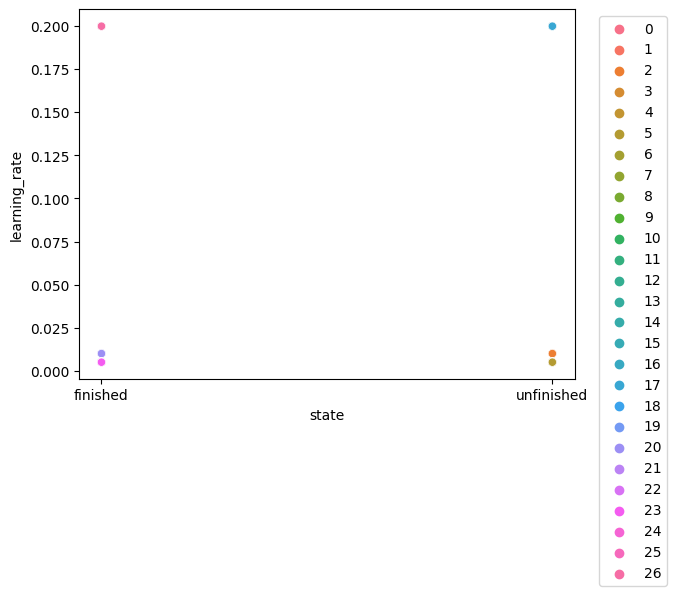

In [52]:
sns.scatterplot(data = all_params, x="state", y="learning_rate", hue="param_setting")
plt.legend(bbox_to_anchor=(1.2,1))

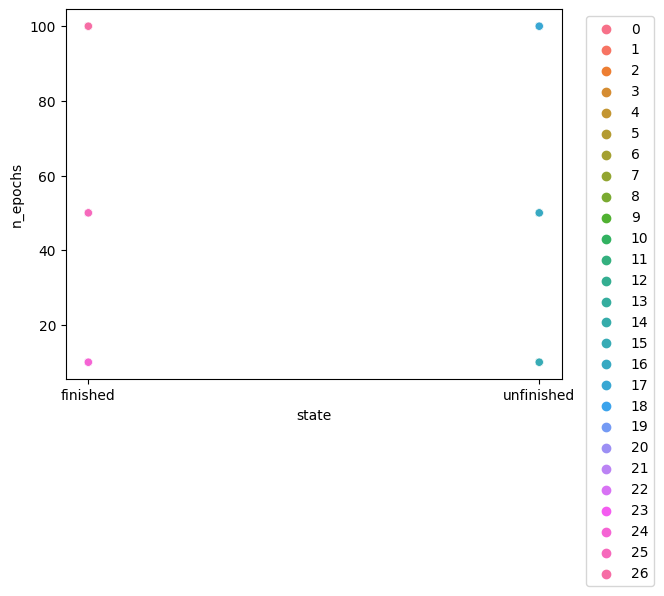

In [53]:
sns.scatterplot(data = all_params, x="state", y="n_epochs", hue="param_setting")
plt.legend(bbox_to_anchor=(1.2,1))

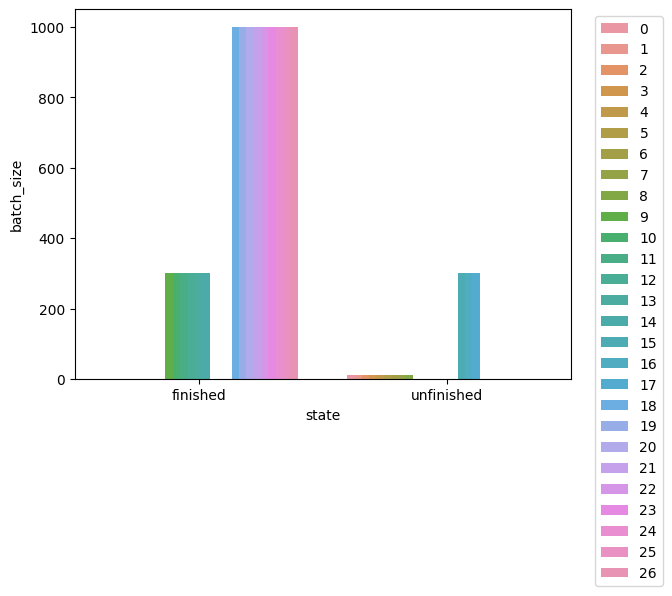

In [54]:
sns.barplot(data = all_params, x="state", y="batch_size", hue="param_setting")
plt.legend(bbox_to_anchor=(1.2,1))